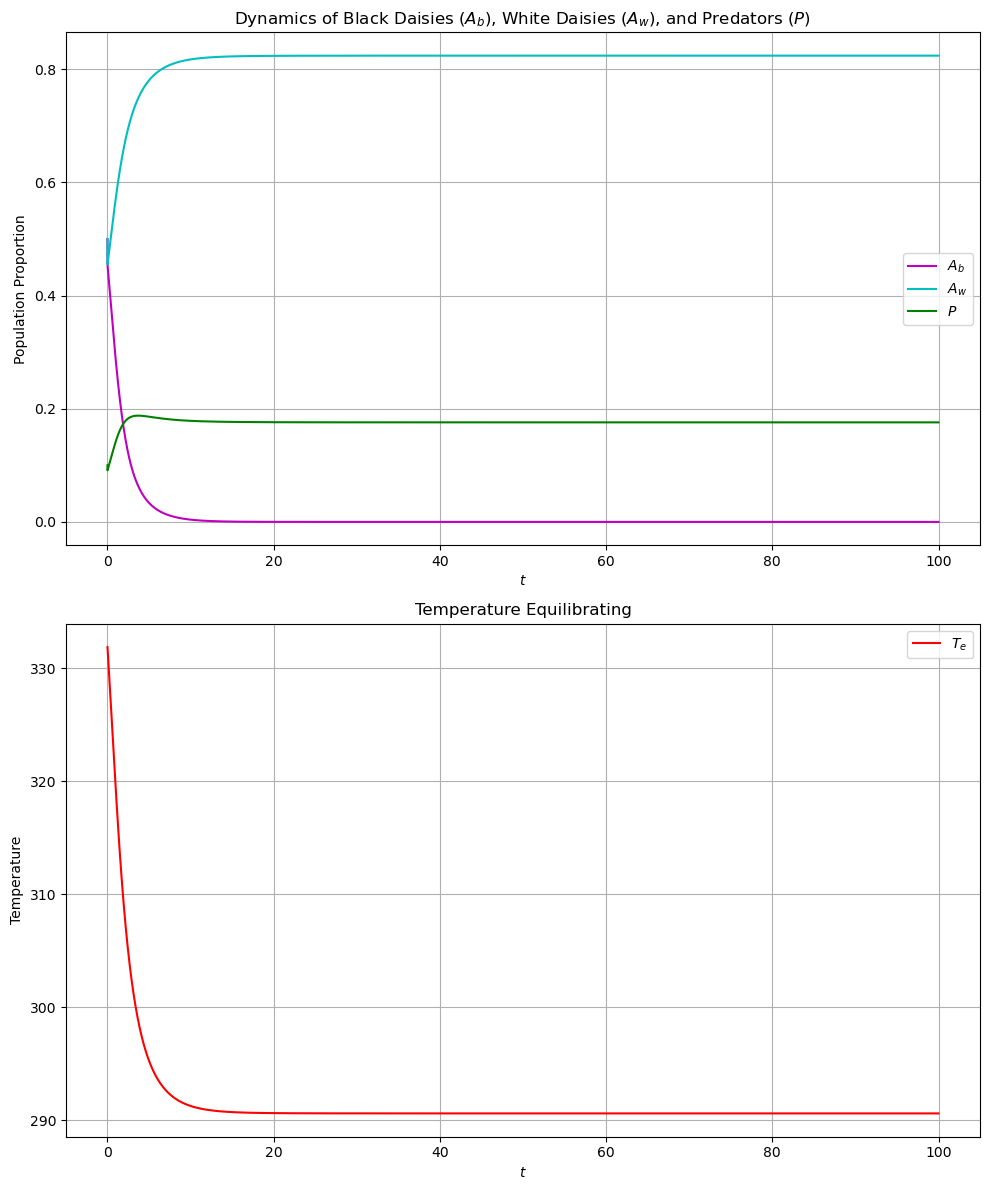

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate of Black Daisy
delta = 0.01     # Death Rate of White Daisy
alpha = 0.3      # Growth Rate of Predators per Daisy eaten
beta = 0.3       # Death Rate of Predators

# dA/dt of Black Daisy
def vb(Ab, Aw, P):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    Tb = (R * L * (S / sigma) * (ap - ab) + (Te ** 4)) ** 0.25  # Black Daisy Temp
    bb = 1 - (0.003265 * ((273.15 + Ti) - Tb) ** 2)       # Black Daisy Growth Rate
    
    return Ab * ((1 - Ab - Aw) * bb - gamma - alpha * P)

# dA/dt of White Daisy
def vw(Ab, Aw, P):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    Tw = (R * L * (S / sigma) * (ap - aw) + (Te ** 4)) ** 0.25  # White Daisy Temp
    bw = 1 - (0.003265 * ((273.15 + Ti) - Tw) ** 2)       # White Daisy Growth Rate
    
    return Aw * ((1 - Aw - Ab) * bw - delta - alpha * P)

# dP/dt of Predators 
def vp(Ab, Aw, P):
    growth_rate = alpha * (Ab + Aw)                     # Increased growth rate based on total daisy abundance
    death_rate = beta * P * (1 - (Ab + Aw) / (1 + Ab + Aw))  # Death rate increases as daisies decrease
    return growth_rate * P - death_rate

def traj2(Ab0, Aw0, P0, dt=0.01, duration=100):
    t = np.arange(0, duration, dt)
    pos = np.zeros((3, len(t)))
    temp = np.zeros((2, len(t)))

    Ab = Ab0
    Aw = Aw0
    P = P0
    
    for i in range(len(t)):
        pos[0, i] = Ab   # Black Daisies population
        pos[1, i] = Aw   # White Daisies population
        pos[2, i] = P    # Predator population
        
        ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
        Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
        Tb = (R * L * (S / sigma) * (ap - ab) + (Te ** 4)) ** 0.25  # Black Daisy Temp
        Tw = (R * L * (S / sigma) * (ap - aw) + (Te ** 4)) ** 0.25  # White Daisy Temp
        
        temp[0, i] = Te   # Store planet temperature
        temp[1, i] = (Tb + Tw) / 2   # Average daisy temperature
        
        Ab += vb(Ab, Aw, P) * dt   # Update Black Daisies population
        Aw += vw(Ab, Aw, P) * dt   # Update White Daisies population
        P += vp(Ab, Aw, P) * dt     # Update Predator population
        
        # Ensure populations do not go negative.
        Ab = max(Ab, 0)
        Aw = max(Aw, 0)
        P = max(P, 0)
        
        total_population = Ab + Aw + P
        
        if total_population > 0:
            Ab /= total_population   # Normalize Black Daisies population to total population
            Aw /= total_population   # Normalize White Daisies population to total population
            P /= total_population     # Normalize Predator population to total population
        
    return t, pos, temp

# Initial conditions: Abundance of Black Daisies, White Daisies and Predators
t, pos, temp = traj2(0.5, 0.5, 0.1)

# Plotting results for Daisies and Predators over time and Temperature Equilibrating
plt.figure(figsize=(10,12))

# Population Dynamics Plot
plt.subplot(2, 1, 1)
plt.plot(t, pos[0], 'm', label='$A_b$')   # Black Daisies
plt.plot(t, pos[1], 'c', label='$A_w$')   # White Daisies
plt.plot(t, pos[2], 'g', label='$P$')      # Predator Population
plt.xlabel('$t$')
plt.ylabel('Population Proportion')
plt.legend()
plt.title('Dynamics of Black Daisies ($A_b$), White Daisies ($A_w$), and Predators ($P$)')
plt.grid()

# Temperature Equilibrating Plot
plt.subplot(2, 1, 2)
plt.plot(t, temp[0], 'r', label='$T_e$')   # Planet Temperature
plt.xlabel('$t$')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature Equilibrating')
plt.grid()

# Save and show the plot
plt.tight_layout()
plt.savefig('Dynamics_of_Biodiversity_and_Temperature.png')
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Constants
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate of Black Daisy
delta = 0.01     # Death Rate of White Daisy

# dA/dt of Black Daisy
def vb(Ab, Aw, P, alpha):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    Tb = (R * L * (S / sigma) * (ap - ab) + (Te ** 4)) ** 0.25  # Black Daisy Temp
    bb = 1 - (0.003265 * ((273.15 + Ti) - Tb) ** 2)       # Black Daisy Growth Rate
    
    return Ab * ((1 - Ab - Aw) * bb - gamma - alpha * P)

# dA/dt of White Daisy
def vw(Ab, Aw, P, alpha):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    Tw = (R * L * (S / sigma) * (ap - aw) + (Te ** 4)) ** 0.25  # White Daisy Temp
    bw = 1 - (0.003265 * ((273.15 + Ti) - Tw) ** 2)       # White Daisy Growth Rate
    
    return Aw * ((1 - Aw - Ab) * bw - delta - alpha * P)

# dP/dt of Predators 
def vp(Ab, Aw, P, beta):
    growth_rate = alpha * (Ab + Aw)                     # Increased growth rate based on total daisy abundance
    death_rate = beta * P * (1 - (Ab + Aw) / (1 + Ab + Aw))  # Death rate increases as daisies decrease
    return growth_rate * P - death_rate

def traj2(Ab0, Aw0, P0=0.1, dt=0.01, duration=30, alpha=0.3, beta=0.3):
    t = np.arange(0, duration, dt)
    pos = np.zeros((3, len(t)))
    temp = np.zeros((2, len(t)))

    Ab = Ab0
    Aw = Aw0
    P = P0
    
    for i in range(len(t)):
        pos[0, i] = Ab   # Black Daisies population
        pos[1, i] = Aw   # White Daisies population
        pos[2, i] = P    # Predator population
        
        ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
        Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
        Tb = (R * L * (S / sigma) * (ap - ab) + (Te ** 4)) ** 0.25  # Black Daisy Temp
        Tw = (R * L * (S / sigma) * (ap - aw) + (Te ** 4)) ** 0.25  # White Daisy Temp
        
        temp[0, i] = Te   # Store planet temperature
        temp[1, i] = (Tb + Tw) / 2   # Average daisy temperature
        
        Ab += vb(Ab, Aw, P, alpha) * dt   # Update Black Daisies population
        Aw += vw(Ab, Aw, P, alpha) * dt   # Update White Daisies population
        P += vp(Ab, Aw, P, beta) * dt     # Update Predator population
        
        # Ensure populations do not go negative.
        Ab = max(Ab, 0)
        Aw = max(Aw, 0)
        P = max(P, 0)
        
        total_population = Ab + Aw + P
        
        if total_population > 0:
            Ab /= total_population   # Normalize Black Daisies population
            Aw /= total_population   # Normalize White Daisies population
            P /= total_population     # Normalize Predator population
        
    return t[-1], pos[:, -1], temp[:, -1]   # Return final time and last populations

# Set up a grid for initial conditions of Black and White Daisies.
black_daisy_init_values = np.linspace(0.01, 1.00, num=10)
white_daisy_init_values = np.linspace(0.01, 1.00, num=10)

# Parameters to vary.
alphas = [0.1, 0.5, 1]
betas = [0.1, 0.5, 1]
initial_ps = [0.1, 0.5, 1]

# Create a directory to save plots if not exists.
if not os.path.exists('Equilibrium_Plots'):
    os.makedirs('Equilibrium_Plots')

# Run simulations for each combination of parameters.
for alpha in alphas:
    for beta in betas:
        for initial_p in initial_ps:
            equilibrium_black_daisies = np.zeros((len(black_daisy_init_values), len(white_daisy_init_values)))
            equilibrium_white_daisies = np.zeros((len(black_daisy_init_values), len(white_daisy_init_values)))
            equilibrium_predators = np.zeros((len(black_daisy_init_values), len(white_daisy_init_values)))
            equilibrium_temperatures = np.zeros((len(black_daisy_init_values), len(white_daisy_init_values)))

            for i in range(len(black_daisy_init_values)):
                for j in range(len(white_daisy_init_values)):
                    _, populations_final, temperatures_final = traj2(
                        black_daisy_init_values[i], 
                        white_daisy_init_values[j], 
                        P0=initial_p,
                        alpha=alpha,
                        beta=beta)
                    
                    equilibrium_black_daisies[i,j] = populations_final[0]
                    equilibrium_white_daisies[i,j] = populations_final[1]
                    equilibrium_predators[i,j] = populations_final[2]
                    equilibrium_temperatures[i,j] = temperatures_final[0]

            fig, axs = plt.subplots(2, 2, figsize=(15,12))

            cax1 = axs[0, 0].imshow(equilibrium_black_daisies.T,
                                     cmap='viridis', aspect='auto',
                                     extent=(black_daisy_init_values[0], black_daisy_init_values[-1],
                                             white_daisy_init_values[0], white_daisy_init_values[-1]))
            axs[0, 0].set_xlabel('Initial Black Daisy Population ($A_b$)')
            axs[0, 0].set_ylabel('Initial White Daisy Population ($A_w$)')
            axs[0, 0].set_title(f'Equilibrium Black Daisy Population\n(alpha={alpha}, beta={beta}, P={initial_p})')
            plt.colorbar(cax1, ax=axs[0, 0], label='Equilibrium $A_b$')

            cax2 = axs[0, 1].imshow(equilibrium_white_daisies.T,
                                     cmap='plasma', aspect='auto',
                                     extent=(black_daisy_init_values[0], black_daisy_init_values[-1],
                                             white_daisy_init_values[0], white_daisy_init_values[-1]))
            axs[0, 1].set_xlabel('Initial Black Daisy Population ($A_b$)')
            axs[0, 1].set_ylabel('Initial White Daisy Population ($A_w$)')
            axs[0, 1].set_title(f'Equilibrium White Daisy Population\n(alpha={alpha}, beta={beta}, P={initial_p})')
            plt.colorbar(cax2, ax=axs[0, 1], label='Equilibrium $A_w$')

            cax3 = axs[1, 0].imshow(equilibrium_predators.T,
                                     cmap='inferno', aspect='auto',
                                     extent=(black_daisy_init_values[0], black_daisy_init_values[-1],
                                             white_daisy_init_values[0], white_daisy_init_values[-1]))
            axs[1, 0].set_xlabel('Initial Black Daisy Population ($A_b$)')
            axs[1, 0].set_ylabel('Initial White Daisy Population ($A_w$)')
            axs[1, 0].set_title(f'Equilibrium Predator Population\n(alpha={alpha}, beta={beta}, P={initial_p})')
            plt.colorbar(cax3, ax=axs[1, 0], label='Equilibrium $P$')

            cax4 = axs[1, 1].imshow(equilibrium_temperatures.T,
                                     cmap='cividis', aspect='auto',
                                     extent=(black_daisy_init_values[0], black_daisy_init_values[-1],
                                             white_daisy_init_values[0], white_daisy_init_values[-1]))
            axs[1, 1].set_xlabel('Initial Black Daisy Population ($A_b$)')
            axs[1, 1].set_ylabel('Initial White Daisy Population ($A_w$)')
            axs[1, 1].set_title(f'Equilibrium Temperature\n(alpha={alpha}, beta={beta}, P={initial_p})')
            plt.colorbar(cax4, ax=axs[1, 1], label='Equilibrium Temperature')

            plt.tight_layout()
            
            filename_suffix = f'alpha_{alpha}_beta_{beta}_P_{initial_p}.png'
            plt.savefig(f'Equilibrium_Plots/Equilibrium_Values_{filename_suffix}')
            plt.close(fig)

print("All plots generated and saved in 'Equilibrium_Plots' directory.")

All plots generated and saved in 'Equilibrium_Plots' directory.
